In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#creating an empty review list
iphone_reviews = []

In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [4]:
##Writing reviews in a text file
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [5]:
import os
os.getcwd()

'/home/suraj/Data science - ExcelR /Assignments'

In [6]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(iphone_reviews)

In [7]:
##Removing unwanted symbols in case present
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [8]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

In [11]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [10]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [12]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [13]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

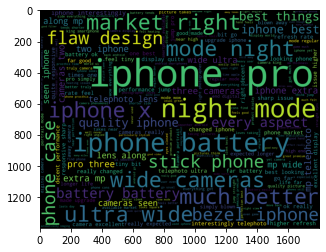

In [15]:
plt.imshow(wordcloud_ip)

In [20]:
# negative words  Choose path for -ve words stored in system
with open("/home/suraj/Downloads/Assignments/Assignment-11/negative-words.txt","r") as neg:
     negwords = neg.read().split("\n")

In [21]:
negwords =negwords[37:]

In [22]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in negwords])

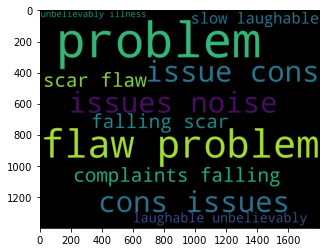

In [23]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [25]:
##Unique words
red_unique = list(set(" ".join(iphone_reviews).split(" ")))
red_unique

['',
 'now.',
 'light',
 'side,',
 'sharp.',
 'capacity',
 'worth',
 '12MP',
 'phone',
 'giving',
 'this',
 'pro,',
 'eyes',
 'one',
 'cons',
 'smartphone,as',
 'out',
 'hand',
 'bezel',
 'pic.This',
 'great.',
 'problem.',
 'battery.',
 'responsive',
 'edges.',
 'In',
 'excellent',
 'However,',
 'usage',
 'problem',
 'evening',
 'Signal,',
 'tasks',
 'effect',
 'height',
 'hand.',
 'near',
 'phone.',
 'longer',
 'hands',
 'becomes',
 'extra',
 'you',
 'etc.This',
 'available',
 'yet.',
 'photographer',
 'It',
 'yesterday',
 'smartphones.',
 'ramifications.',
 'sleek',
 'falling',
 '\n\n',
 'iPhone.',
 'measure',
 'buy',
 'iPhone12pro',
 'far',
 'phenomenal.',
 'twice.',
 'One',
 'long',
 'ever',
 'video',
 'slippery.',
 'an',
 'To',
 'VerdictOverall,',
 'imaging',
 'or',
 "Haven't",
 'perfection!',
 'it.',
 'get',
 'shorter',
 'seen',
 'also',
 'can',
 'amazing.\n\n',
 'spent',
 'Awesome.',
 'phones',
 'time',
 'pretty',
 'especially',
 'end',
 'office',
 'Is',
 'gives',
 'is',
 'Nigh

### Emotion Mining

In [27]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-11/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [28]:
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

["Only issue is it does not have a higher refresh rate but you won't feel that in a tiny bit!!",
 'Go for it!',
 '!So far the the battery is just ok I really expected longer life.',
 'So far so good!!',
 'Just made an upgrade from iPhone X to iPhone 12 pro, and I’m simply so blown away by the camera of this phone, the quality of the picture it takes is so very near to that of a high end digital camera.',
 'The portrait mode, the night mode, the regular mode, wow, everything just got so much better.',
 'This is truly a camera king smartphone available on the market right now.',
 'If you are a photographer or loves taking pictures, think no further, just jump in straight with eyes closed to get this phone.The only cons I find with this phone is battery tends to be on the shorter side, other than that, everything’s just so very near to perfection!',
 '👍\n\n \n\n  It’s the best iPhone yet.',
 'Camera and display is amazing.']

In [29]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\n\n The iPhone 12 Pro has three cameras agai...
1,So there is an extra 12MP telephoto lens along...
2,"Interestingly, the telephoto and the ultra wid..."
3,One of the best looking phone in the market ri...
4,Camera is excellent and the display is quite r...
...,...
589,I have Prebooked this iPhone12 pro and receive...
590,This iPhone 12pro Is the best in all the thing...
591,In Night Mode there is correct balance of ligh...
592,The video is so smooth with correct audio.When...


In [30]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [31]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [32]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [33]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [34]:
# test that it works
calculate_sentiment(text = 'good')

3

In [35]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [37]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    14
1    22
2    17
3    19
4    11
5    20
6     3
7    13
8     4
9    42
Name: word_count, dtype: int64

In [38]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
353,As usual great & premium phone of 2020 .ProsTh...,6,32
524,This iPhone 12pro Is the best in all the thing...,11,41
458,This iPhone 12pro Is the best in all the thing...,11,41
194,This iPhone 12pro Is the best in all the thing...,11,41
326,This iPhone 12pro Is the best in all the thing...,11,41
128,This iPhone 12pro Is the best in all the thing...,11,41
62,This iPhone 12pro Is the best in all the thing...,11,41
590,This iPhone 12pro Is the best in all the thing...,11,41
392,This iPhone 12pro Is the best in all the thing...,11,41
260,This iPhone 12pro Is the best in all the thing...,11,41


In [39]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    594.000000
mean       1.333333
std        2.246977
min       -3.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       11.000000
Name: sentiment_value, dtype: float64

In [41]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
0,\n\n The iPhone 12 Pro has three cameras agai...,0,14
1,So there is an extra 12MP telephoto lens along...,0,22
2,"Interestingly, the telephoto and the ultra wid...",0,17
5,Only issue is it does not have a higher refres...,0,20
6,Go for it!,0,3


In [42]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
62,This iPhone 12pro Is the best in all the thing...,11,41
128,This iPhone 12pro Is the best in all the thing...,11,41
194,This iPhone 12pro Is the best in all the thing...,11,41
260,This iPhone 12pro Is the best in all the thing...,11,41
326,This iPhone 12pro Is the best in all the thing...,11,41


In [43]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Count'>

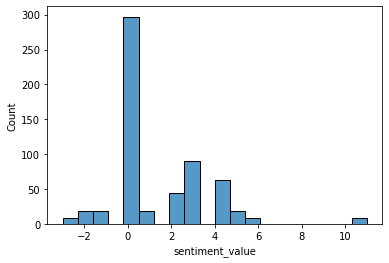

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

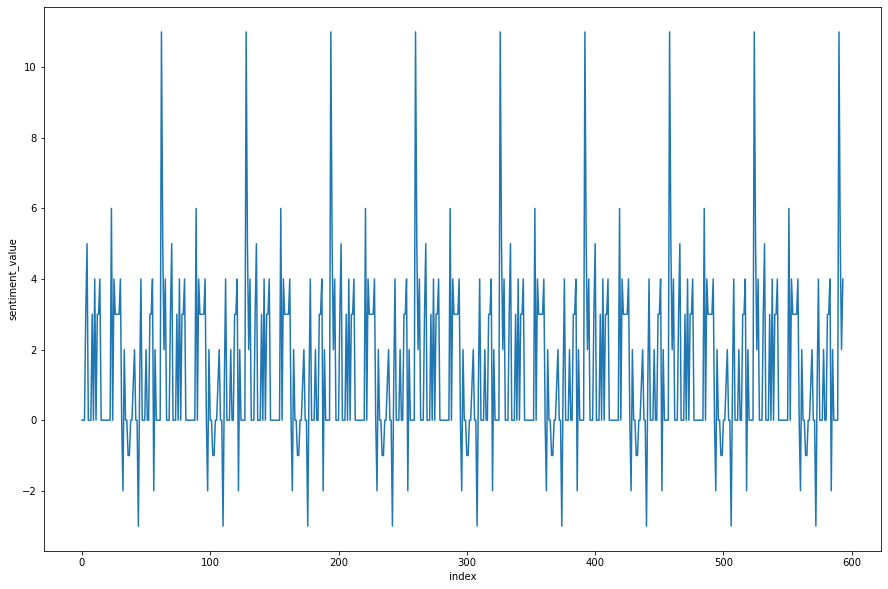

In [45]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

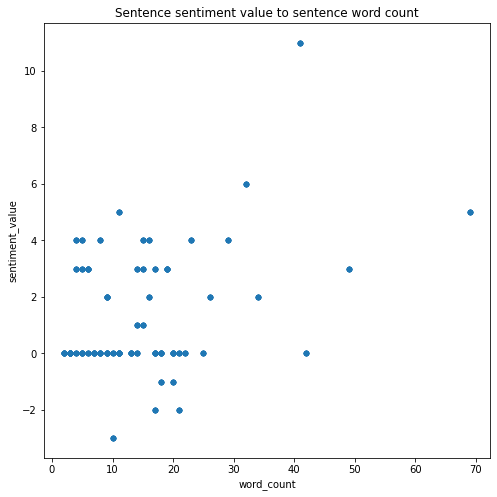

In [46]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')